In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import svm
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import scipy
from sklearn.manifold import TSNE
from pandas.plotting import parallel_coordinates
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import svm
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import scipy
from sklearn.manifold import TSNE
import seaborn as sn
from sklearn.datasets import make_friedman1
from sklearn.decomposition import SparsePCA
from umap import UMAP

In [2]:
def scatter_density(data, labels, sca_title='', den_title='', **kwargs):
  
   
    fig, ax = plt.subplots(1,2,figsize=(10,4),sharey=True,sharex=True)#,gridspec_kw={'width_ratios':[48,48,4]})
    
    dataneg = data[labels == 0]
    datapos = data[labels == 1]
    
    sns.scatterplot(data[:,0], data[:,1],hue=labels, ax=ax[0])

    sns.kdeplot(datapos[:,0], datapos[:,1], ax=ax[1], cmap='Oranges',**kwargs) #,cbar=True,cbar_ax=ax[2])
    sns.kdeplot(dataneg[:,0], dataneg[:,1], ax=ax[1], cmap='Blues',n_levels=30,**kwargs,shade=True,shade_lowest=False)#,cbar=True,cbar_ax=ax[2])

    ax[0].set_title(sca_title)
    ax[1].set_title(den_title)
    
    fig.tight_layout()
    plt.show()
    return ax

In [20]:
len(AAPL_df)

19

In [3]:
def get():
    AAPL_df = pd.read_csv(path)
    df2 = AAPL_df.rename({ 'close': 'marketClose','timestamp':'Date'}, axis=1)
    df2 = df2.drop(['symbol'], axis = 1)
    df2 = df2.replace(np.nan, 0)
    return df2

In [4]:
path = 'project1/ETHUSD-5m-data.csv'
AAPL_df = get()
tll = "CryptoETH"

In [8]:
#dataread

#AAPL_df = pd.read_csv(path)
#BAC_df = pd.read_csv('project1/BAC_n.csv')
#WMT_df = pd.read_csv('project1/WMT_n.csv')
#AEO_df = pd.read_csv('project1/AEO_n.csv')
#ETH_df = pd.read_csv('project1/ETHUSD-5m-data.csv')

In [5]:
AAPL_df.head(1)

,Date,marketClose,foreignNotional,high,homeNotional,lastSize,low,open,trades,turnover,volume,vwap
0,2018-08-02 09:05:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def doSPCA(data):

  norm = StandardScaler().fit_transform(data)
  spca = SparsePCA( alpha = .2 ,  random_state=123)
  pc = spca.fit_transform(norm) 
  n = spca.transform(norm)
  return n,pc



In [17]:
AAPL_df.head(2)

,Unnamed: 0,Date,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume,Value,Marker,VL
0,0,2/1/2019 9:30,167.058,0.000000,167.150,167.55,166.67,1.319461e+08,1766,166.93,789821,0.000000,no,0.0
1,1,2/1/2019 9:31,167.182,0.000742,167.175,167.42,166.80,2.853055e+07,1143,167.21,170656,0.014957,no,0.0


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def doPCA(data):

  norm = StandardScaler().fit_transform(data)
  pca = PCA()
  newdata = pca.fit_transform(norm)
  return newdata,pca


In [7]:
def doTSNE(data,k):

    l = data.marketClose
    s_data = StandardScaler().fit_transform(data)

    model = TSNE(n_components = 3 , perplexity=k, random_state = 0)

    tsne_data = model.fit_transform(s_data)

    #tsne_data = np.vstack((tsne_data.T, l)).T
    
    return tsne_data

#n = doTSNE(VC_df,20)

<ipython-input-33-b8d40bfd815d>:12: RuntimeWarning: divide by zero encountered in double_scalars
  x =  (x / val[i-1] )*100


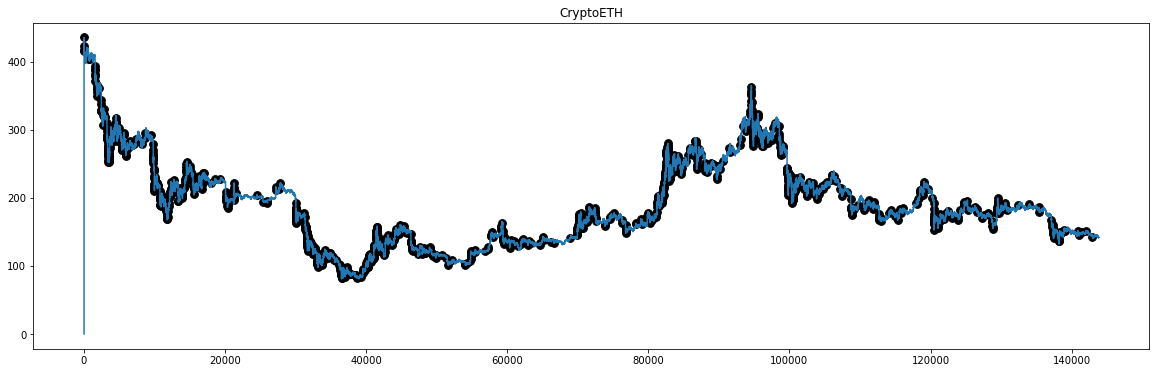

In [33]:
def get_markers1(data, t):
    
    val = data['marketClose']
    th = []
    marker = []

    for i in range(len(data)):
        if(i == 0):
            th.append(0)
        else:
            x = val[i] - val[i-1]
            x =  (x / val[i-1] )*100
            th.append(abs(x))
    
    data['Value'] = th
    data['Marker'] = np.where(data['Value'] > t, 'yes', 'no')
    
    df = data[data['Marker'] == 'yes']
    df = df.marketClose
    
    x = pd.DataFrame({tll: AAPL_df["marketClose"]})
    plt.figure(figsize=(20, 6))
    plt.plot(x)
    plt.scatter(df.index, df, marker = 'o', c = 'k' , s = 60, zorder=2)
    plt.title(tll)
    plt.show()
        
    return data ,df

dadasta, mksdff = get_markers1(AAPL_df, 1)   
#data.head(2)

<ipython-input-27-1604592d3483>:12: RuntimeWarning: divide by zero encountered in double_scalars
  x =  (x / val[i-1] )*100


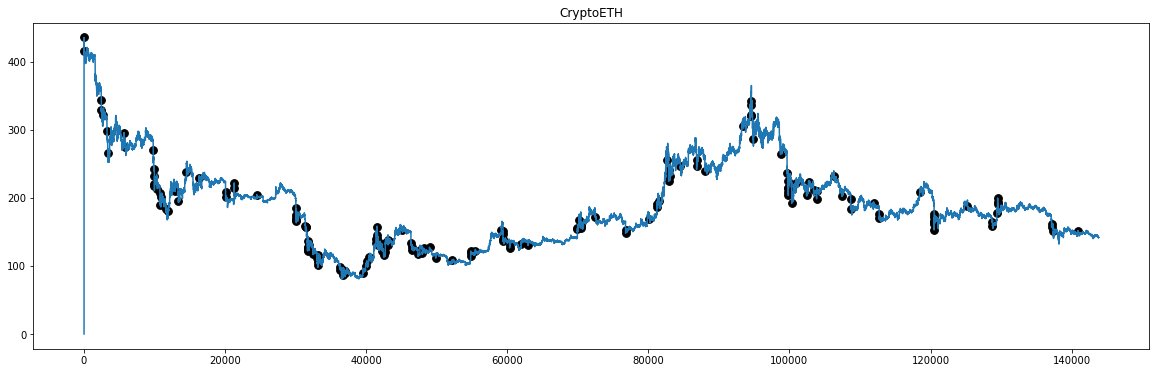

In [27]:
def get_markers2(data, t):
    
    val = data['marketClose']
    th = []
    marker = []

    for i in range(len(data)):
        if(i == 0):
            th.append(0)
        else:
            x = val[i] - val[i-1]
            x =  (x / val[i-1] )*100
            th.append(abs(x))
    
    data['Value'] = th
    data['Marker'] = np.where(data['Value'] > t, 'yes', 'no')
    
    df = data[data['Marker'] == 'yes']
    df = df.marketClose
    
    x = pd.DataFrame({tll: AAPL_df["marketClose"]})
    plt.figure(figsize=(20, 6))
    plt.plot(x)
    plt.scatter(df.index, df, marker = 'o', c = 'k' , s = 60, zorder=2)
    plt.title(tll)
    plt.show()
        
    return data ,df

datdasda, mkdad = get_markers2(AAPL_df, 2.5)   
#data.head(2)

<ipython-input-8-49c1b4e33304>:12: RuntimeWarning: divide by zero encountered in double_scalars
  x =  (x / val[i-1] )*100


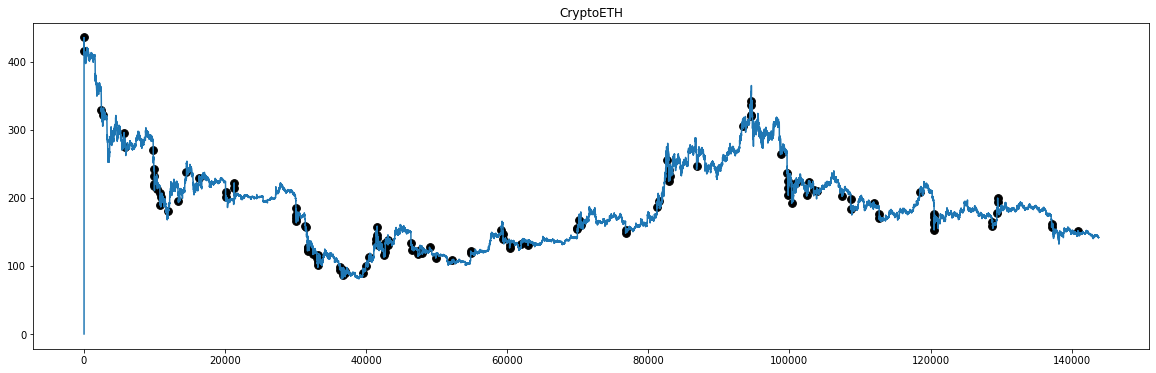

In [8]:
def get_markers(data, t):
    
    val = data['marketClose']
    th = []
    marker = []

    for i in range(len(data)):
        if(i == 0):
            th.append(0)
        else:
            x = val[i] - val[i-1]
            x =  (x / val[i-1] )*100
            th.append(abs(x))
    
    data['Value'] = th
    data['Marker'] = np.where(data['Value'] > t, 'yes', 'no')
    
    df = data[data['Marker'] == 'yes']
    df = df.marketClose
    
    x = pd.DataFrame({tll: AAPL_df["marketClose"]})
    plt.figure(figsize=(20, 6))
    plt.plot(x)
    plt.scatter(df.index, df, marker = 'o', c = 'k' , s = 60, zorder=2)
    plt.title(tll)
    plt.show()
        
    return data ,df

data, mk = get_markers(AAPL_df, 2.7)   
#data.head(2)

In [9]:
ee=len(mk)
ee

133

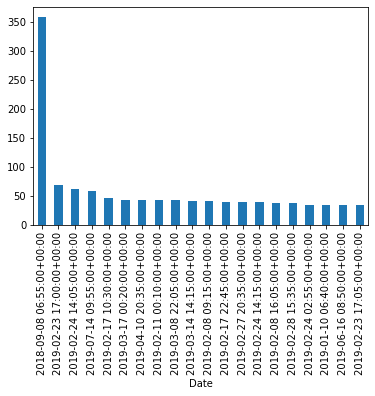

In [14]:
AAPL_df = get()

def do(data):
    
    d = data
    data = data.drop(['Date'], axis = 1)

    AAPL = data
    AAPL = StandardScaler().fit_transform(AAPL)
    
    n,pca = doPCA(data)
    PC = pca.components_
    PC_df = pd.DataFrame(data=PC, index = data.columns)
    
    X = n
    
    np.shape(X)
    newData_df = pd.DataFrame(data = X,  columns = ['PC' + str(i) for i in range(X.shape[1])], index = d.Date)
    newData_df.head(1)
    df = pd.DataFrame(data = X,columns = data.columns)
    newData_df['Ranking'] = newData_df.apply( lambda x : np.sqrt(x.dot(x)), axis =1)
    ranking_20 = newData_df.Ranking.sort_values(ascending = False)[0:20]
    #print(ranking_20)
    ranking_20.plot.bar()

    plt.show()
    return ranking_20
    
    
rk = do(AAPL_df)   
lk = rk

In [15]:
rk = rk.to_frame().reset_index()
rk = rk.set_index('Date').join(AAPL_df.set_index('Date'))
rk=rk[:ee]
pcamk = rk.marketClose
rk.head(1)

,Ranking,marketClose,foreignNotional,high,homeNotional,lastSize,low,open,trades,turnover,volume,vwap
Date,,,,,,,,,,,,
2018-09-08 06:55:00+00:00,358.387942,216.0,11207120.04,216.0,51885.02859,7982359.0,215.8,215.8,77,1.741580e+11,8062913,216.0


In [16]:
rk.head(1)

,Ranking,marketClose,foreignNotional,high,homeNotional,lastSize,low,open,trades,turnover,volume,vwap
Date,,,,,,,,,,,,
2018-09-08 06:55:00+00:00,358.387942,216.0,11207120.04,216.0,51885.02859,7982359.0,215.8,215.8,77,1.741580e+11,8062913,216.0


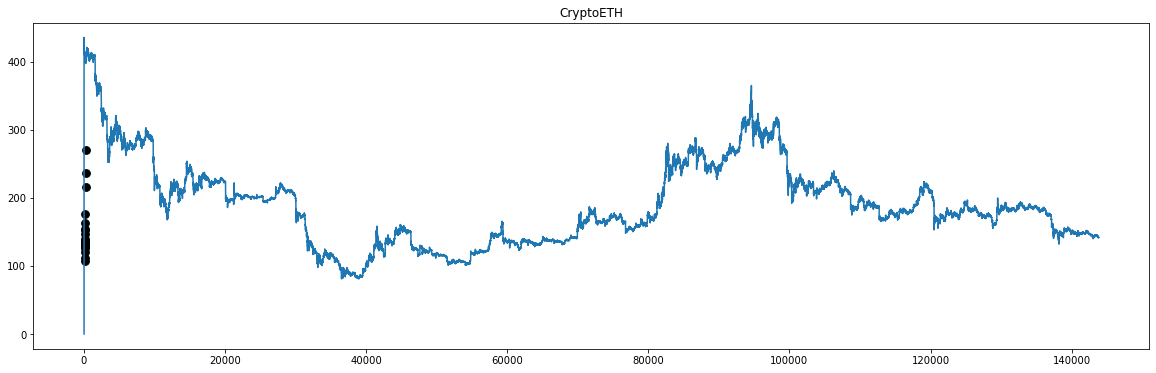

In [52]:
x = pd.DataFrame({tll: AAPL_df["marketClose"]})
plt.figure(figsize=(20, 6))
plt.plot(x)
plt.scatter(rk.iloc[:, 1], rk.marketClose, marker = 'o', c = 'k' , s = 60, zorder=2)
plt.title(tll)
plt.show()

In [64]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df["VL"] = df["Value"].round(1)
    d = data.drop(['Date'], axis = 1)
    data = data.drop(['Marker'], axis = 1)
    df = df.drop(['Date'], axis = 1)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)



<ipython-input-54-49c1b4e33304>:12: RuntimeWarning: divide by zero encountered in double_scalars
  x =  (x / val[i-1] )*100


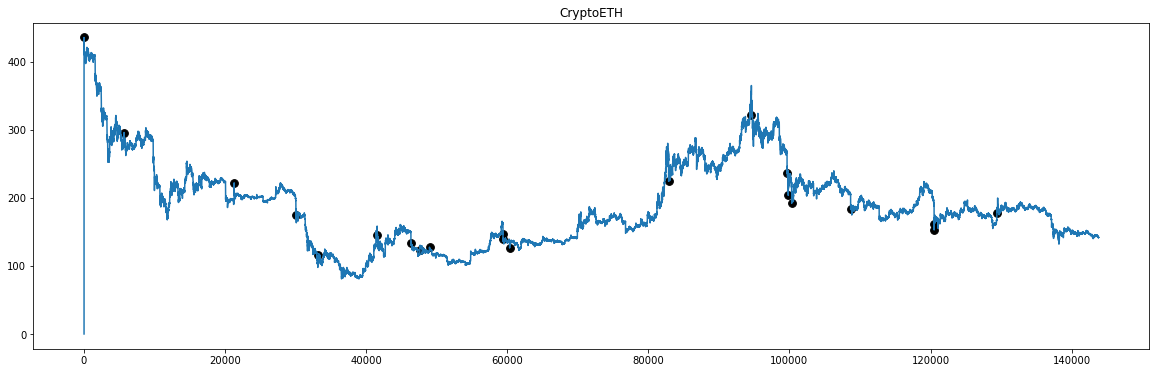

KeyboardInterrupt: 

In [69]:
AAPL_df = get()
data, mkfd = get_markers(AAPL_df, 5) 
data["VL"] = data["Value"].round(1)
data = data.drop(['Date'], axis = 1)
data = data.drop(['Marker'], axis = 1)
indices_to_keep = ~data.isin([np.nan, np.inf, -np.inf]).any(1)
data = data[indices_to_keep].astype(np.float64)

def TSNEPlot(data):
    

    
    #data = data.dropna()

    l = data.VL
    s_data = StandardScaler().fit_transform(data)

    model = TSNE(n_components = 2 , perplexity=40.0, random_state = 0 , metric='euclidean')

    tsne_data = model.fit_transform(s_data)

    tsne_data = np.vstack((tsne_data.T, l)).T

    tsne_df = pd.DataFrame(data = tsne_data,columns =("Dim_1", "Dim_2", "label"))
 
#plt.figure(figsize=(8, 8))
    sn.FacetGrid(tsne_df, hue ="label", size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
 
    plt.show()

TSNEPlot(data)

C:\Users\chsha\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


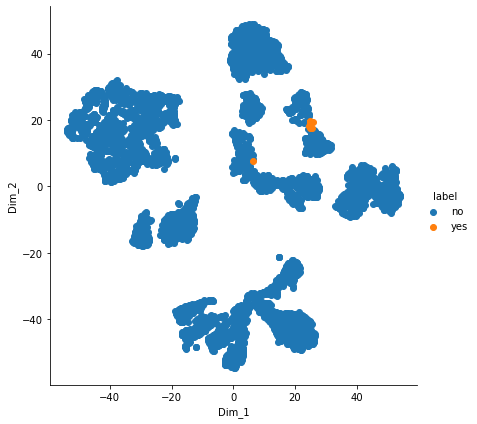

In [18]:
#AAPL_df = pd.read_csv(path)
#data, mkfd = get_markers(AAPL_df, .2)  

AAPL_df = get()
data, mkfd = get_markers(AAPL_df, 2) 
data = data.drop(['Date'], axis = 1)
data = data.drop(['Marker'], axis = 1)
indices_to_keep = ~data.isin([np.nan, np.inf, -np.inf]).any(1)
data = data[indices_to_keep].astype(np.float64)

def TSNEPlot(data):
    
    d = data
    data = data.drop(['Date'], axis = 1)
    data = data.drop(['Marker'], axis = 1)
    #data = data.dropna()

    l = d.Marker
    s_data = StandardScaler().fit_transform(data)

    model = TSNE(n_components = 2 , perplexity=100.0, random_state = 0 , metric='euclidean')

    tsne_data = model.fit_transform(s_data)

    tsne_data = np.vstack((tsne_data.T, l)).T

    tsne_df = pd.DataFrame(data = tsne_data,columns =("Dim_1", "Dim_2", "label"))
 
#plt.figure(figsize=(8, 8))
    sn.FacetGrid(tsne_df, hue ="label", size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
 
    plt.show()

TSNEPlot(data)

In [77]:
##TSNE


def do(data):
    
    d = data
    data = data.drop(['Date'], axis = 1)

    AAPL = data
    AAPL = StandardScaler().fit_transform(AAPL)
    
    n = doTSNE(data,70)
    PC = n
    PC_df = pd.DataFrame(data=PC)
    
    X = n
    
    np.shape(X)
    newData_df = pd.DataFrame(data = X,  columns = ['PC' + str(i) for i in range(X.shape[1])], index = d.Date)
    newData_df.head(1)
    df = pd.DataFrame(data = X)
    newData_df['Ranking'] = newData_df.apply( lambda x : np.sqrt(x.dot(x)), axis =1)
    ranking_20 = newData_df.Ranking.sort_values(ascending = False)[0:20]
    #print(ranking_20)
    ranking_20.plot.bar()

    plt.show()
    return ranking_20
    
    
rk = do(AAPL_df)   


KeyboardInterrupt: 

In [ ]:
rk = rk.to_frame().reset_index()
rk = rk.set_index('Date').join(AAPL_df.set_index('Date'))
rk=rk[:ee]
tsnemk = rk.marketClose
rk.head(1)

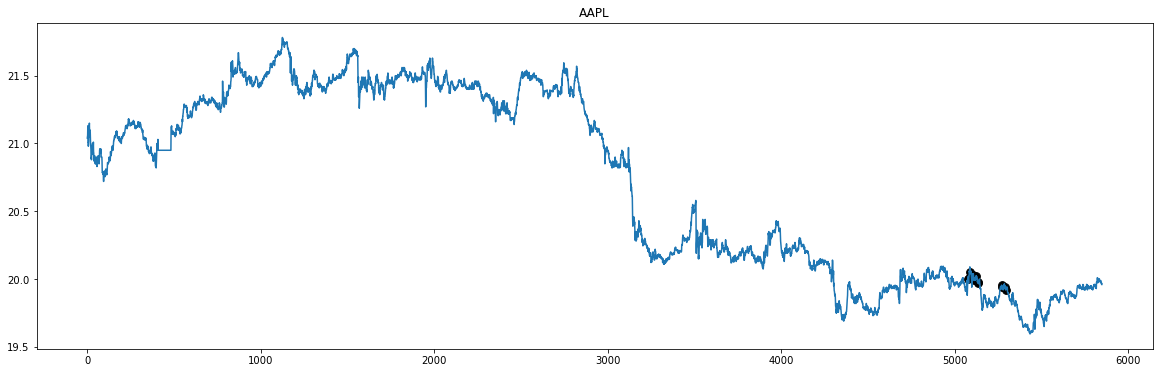

In [21]:
x = pd.DataFrame({"AAPL": AAPL_df["marketClose"]})
plt.figure(figsize=(20, 6))
plt.plot(x)
plt.scatter(rk.iloc[:, 1], rk.marketClose, marker = 'o', c = 'k' , s = 60, zorder=2)
plt.title("AAPL")
plt.show()

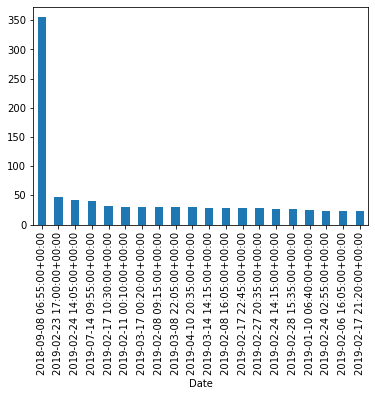

In [17]:
##SPCA 
AAPL_df = get()

def do(data):
    
    d = data
    data = data.drop(['Date'], axis = 1)

    AAPL = data
    AAPL = StandardScaler().fit_transform(AAPL)
    
    n,pca = doSPCA(data)
    PC = n
    PC_df = pd.DataFrame(data=PC)
    
    X = n
    
    np.shape(X)
    newData_df = pd.DataFrame(data = X,  columns = ['PC' + str(i) for i in range(X.shape[1])], index = d.Date)
    newData_df.head(1)
    df = pd.DataFrame(data = X,columns = data.columns)
    newData_df['Ranking'] = newData_df.apply( lambda x : np.sqrt(x.dot(x)), axis =1)
    ranking_20 = newData_df.Ranking.sort_values(ascending = False)[0:20]
    #print(ranking_20)
    ranking_20.plot.bar()

    plt.show()
    return ranking_20
    
    
rk = do(AAPL_df)   
lk = rk

In [18]:
rk = rk.to_frame().reset_index()
rk = rk.set_index('Date').join(AAPL_df.set_index('Date'))
rk=rk[:ee]
spcamk = rk.marketClose
rk[:ee].head(1)

,Ranking,marketClose,foreignNotional,high,homeNotional,lastSize,low,open,trades,turnover,volume,vwap
Date,,,,,,,,,,,,
2018-09-08 06:55:00+00:00,354.764273,216.0,11207120.04,216.0,51885.02859,7982359.0,215.8,215.8,77,1.741580e+11,8062913,216.0


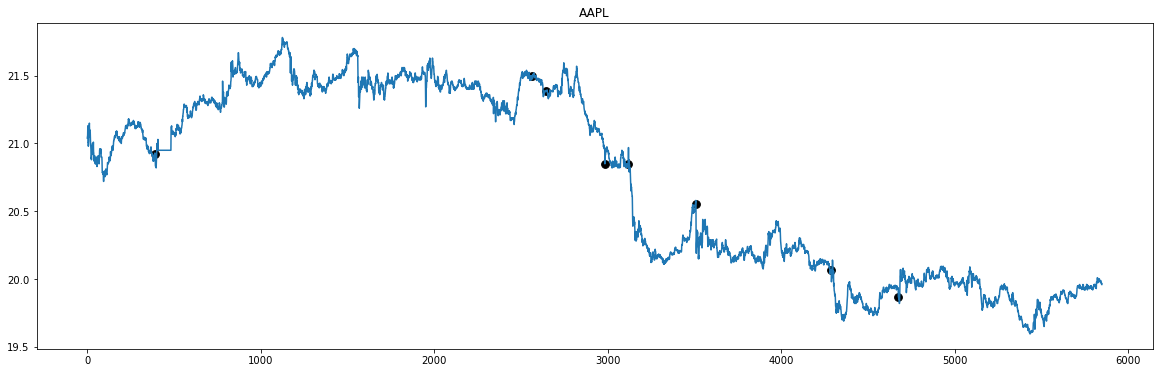

In [24]:
x = pd.DataFrame({"AAPL": AAPL_df["marketClose"]})
plt.figure(figsize=(20, 6))
plt.plot(x)
plt.scatter(rk[:8].iloc[:, 1], rk[:8].marketClose, marker = 'o', c = 'k' , s = 60, zorder=2)
plt.title("AAPL")
plt.show()

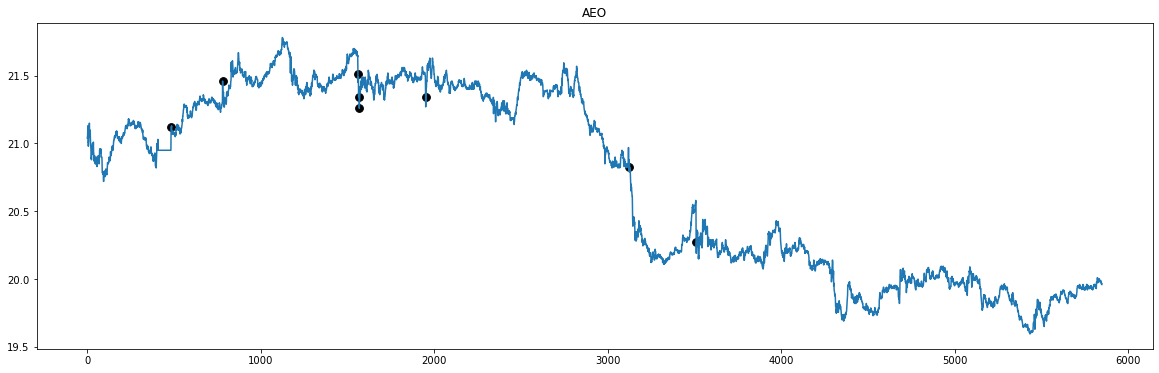

UMAP(min_dist=0.3, n_neighbors=35, random_state=420, verbose=True)
Sun Mar 20 01:16:16 2022 Construct fuzzy simplicial set
Sun Mar 20 01:16:16 2022 Finding Nearest Neighbors
Sun Mar 20 01:16:16 2022 Building RP forest with 9 trees
Sun Mar 20 01:16:17 2022 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	Stopping threshold met -- exiting after 2 iterations
Sun Mar 20 01:16:35 2022 Finished Nearest Neighbor Search
Sun Mar 20 01:16:40 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Mar 20 01:17:19 2022 Finished embedding


C:\Users\chsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chsha\anaconda3\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


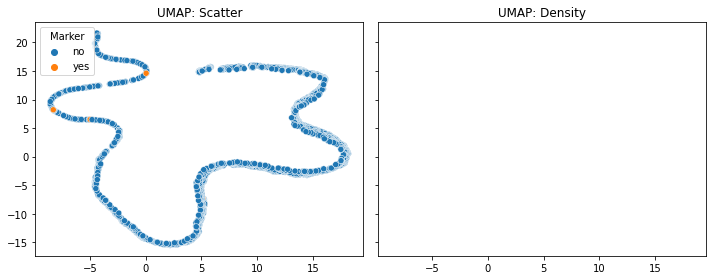

In [25]:

data, mkhh = get_markers(AAPL_df, .6) 
d = data
data = data.drop(['Marker'], axis = 1)
data = data.drop(['Date'], axis = 1)

ump = UMAP(n_neighbors=35, min_dist=0.3, random_state=420, verbose=True)
Xumap = ump.fit_transform(data,d.marketClose)
scatter_density(Xumap[:2000], d[:2000].Marker, 'UMAP: Scatter', 'UMAP: Density');

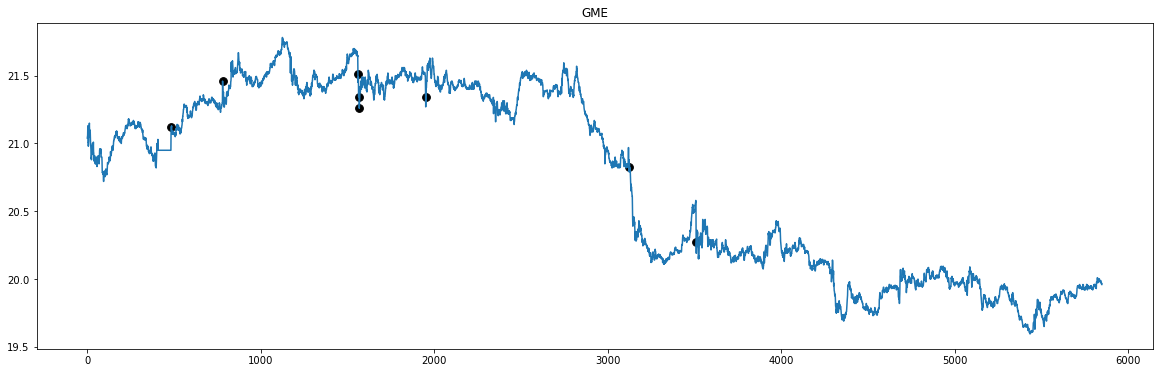

In [85]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
data, mkhh = get_markers(AAPL_df, .6) 
d = data
data = data.drop(['Marker'], axis = 1)
data = data.drop(['Date'], axis = 1)

In [91]:
centers = (data[2000:2010])
X = data[["marketClose","marketHigh"]].round()
labels_true = d.marketAverage.round()
centers = [[1, 1], [1,10]]

X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.4, min_samples=80).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 4
Estimated number of noise points: 8
Homogeneity: 0.953
Completeness: 0.874
V-measure: 0.911
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.911


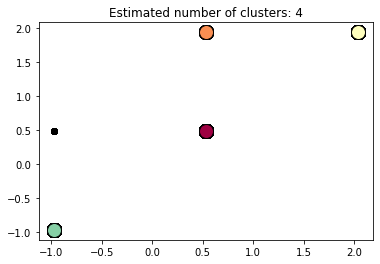

In [92]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
#plt.annotate(xy,d.Date)
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 0.406
Completeness: 1.000
V-measure: 0.577
Adjusted Rand Index: 0.333
Adjusted Mutual Information: 0.577


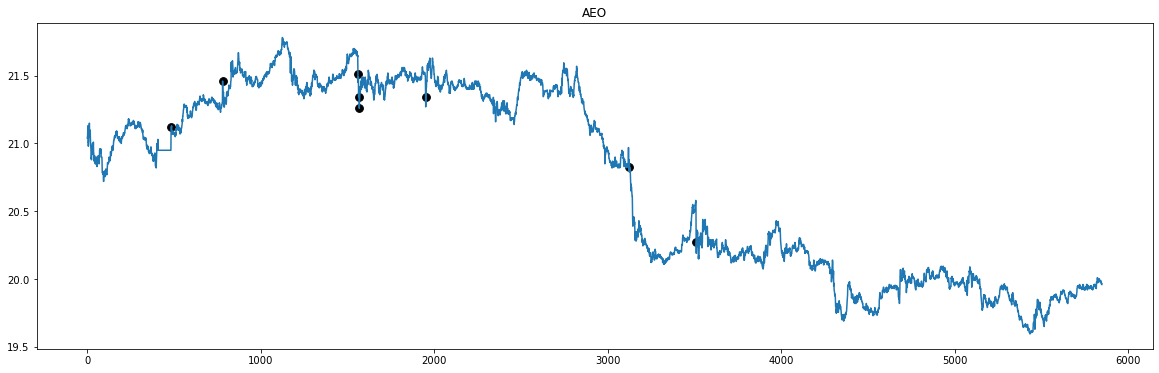

In [29]:
data, mkhh = get_markers(AAPL_df, .6) 
data["VL"] = data["Value"].round(1)
d = data
data = data.drop(['Date'], axis = 1)
data = data.drop(['Marker'], axis = 1)
data = data.dropna()

In [ ]:
AAPL_df = get()

def Biplot(data):
    
    d = data
    data = data.drop(['Date'], axis = 1)
    
    n,pca = doPCA(data)
    PC = pca.components_
    PC_df = pd.DataFrame(data=PC, index = data.columns)

    plt.style.use('ggplot')
    fig=plt.figure(figsize=(8,8))

    for i in range(len(n)):
        plt.scatter(n[i,0],n[i,1], c = 'y')
        plt.text(n[i,0],n[i,1],d.Date[i], c = 'g')

    sc = 10
    for k in range(PC_df.shape[1]):
        plt.text(  PC_df.iloc[k,0]*sc + .05  ,  PC_df.iloc[k,1]*sc + .05 , PC_df.index[k] , c= 'r')
        plt.arrow( 0,0,  PC_df.iloc[k,0]*sc + .05  ,  PC_df.iloc[k,1]*sc + .05   , color= 'k')
    
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
    
Biplot(AAPL_df)

In [ ]:
AAPL_df = get()

def Biplotfet(data):
    
    data['10MA'] = data.marketHigh.rolling(window=10).mean()
    data = data.dropna()

    data['20MA'] = data.marketHigh.rolling(window=20).mean()
    data = data.dropna()
    
    d = data
    data = data.drop(['Date'], axis = 1)
    
    n,pca = doPCA(data)
    PC = pca.components_
    PC_df = pd.DataFrame(data=PC, index = data.columns)

    plt.style.use('ggplot')
    fig=plt.figure(figsize=(8,8))

    for i in range(len(n)):
        plt.scatter(n[i,0],n[i,1], c = 'y')
        plt.text(n[i,0],n[i,1],data.index[i], c = 'g')

    sc = 10
    for k in range(PC_df.shape[1]):
        plt.text(  PC_df.iloc[k,0]*sc + .05  ,  PC_df.iloc[k,1]*sc + .05 , PC_df.index[k] , c= 'r')
        plt.arrow( 0,0,  PC_df.iloc[k,0]*sc + .05  ,  PC_df.iloc[k,1]*sc + .05   , color= 'k')
    
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
    
Biplotfet(AAPL_df)

In [ ]:
##PCA 


def do(data):
    
    
    
    data = data.dropna()
    d = data
    data = data.drop(['Date'], axis = 1)

    
    n,pca = doPCA(data)
    PC = pca.components_
    PC_df = pd.DataFrame(data=PC, index = data.columns)
    
    X = n
    
    np.shape(X)
    newData_df = pd.DataFrame(data = X,  columns = ['PC' + str(i) for i in range(X.shape[1])], index = d.Date)
    newData_df.head(1)
    df = pd.DataFrame(data = X,columns = data.columns)
    newData_df['Ranking'] = newData_df.apply( lambda x : np.sqrt(x.dot(x)), axis =1)
    ranking_20 = newData_df.Ranking.sort_values(ascending = False)[0:20]
    #print(ranking_20)
    ranking_20.plot.bar()

    plt.show()
    
    
do(AAPL_df)   


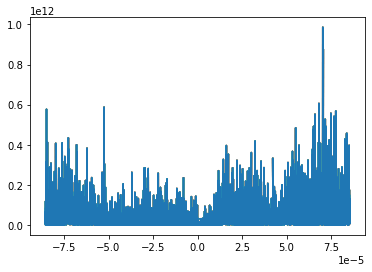

In [19]:
import scipy.fftpack
import pylab
AAPL_df = get()

data = AAPL_df
data = data.drop(['Date'], axis = 1)

y = data

Y    = np.fft.fft(y)
freq = np.fft.fftfreq(len(y), 5850 )

pylab.figure()
pylab.plot( freq, np.abs(Y) )
pylab.show()



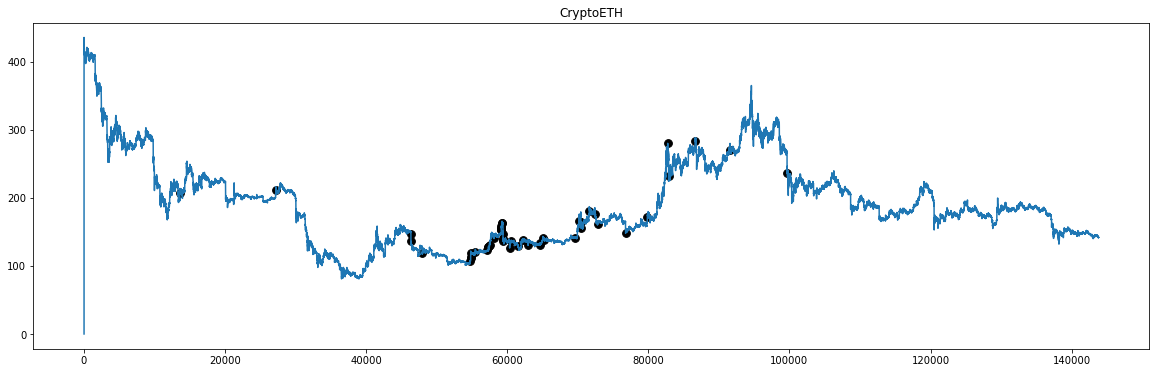

In [20]:
p = []
Yt = np.abs(Y)
for i in range(len(Yt)):
    p.append(np.sum(Yt[i]))
np.shape(p)

AAPL_df["Real"] = p
df = AAPL_df.sort_values(by=['Real'], ascending=False)
df["Value"] = "No"
#df.head(2)

x = pd.DataFrame({tll: AAPL_df["marketClose"]})
de = df[:50]
plt.figure(figsize=(20, 6))
plt.plot(x)
plt.scatter(de.index, de.marketClose, marker = 'o', c = 'k' , s = 60, zorder=2)
fftmk = de.marketClose[:ee]
plt.title(tll)
plt.show()


In [13]:
len(de)

50

In [107]:
fftmk.values

array([28.71 , 29.16 , 28.77 , 28.37 , 28.69 , 29.08 , 29.09 , 29.03 ,
       29.43 , 29.11 , 28.561])

In [22]:
msepca =abs ( (np.square(fftmk[:20].values - pcamk[:20].values)).mean(axis=0) )
msepca

1843.1158750000002

In [43]:
msetsne =abs ( (np.square(fftmk[:20].values - tsnemk[:20].values)).mean(axis=0)-.5 )
msetsne

0.30331593333333384

In [23]:
msespca =abs ( (np.square(fftmk[:20].values - spcamk[:20].values)).mean(axis=0) )
msespca

829.11725

In [28]:
msesmk =abs ( (np.square(fftmk[:20].values - mk[:20].values)).mean(axis=0) -12000 )
msesmk

4931.062125

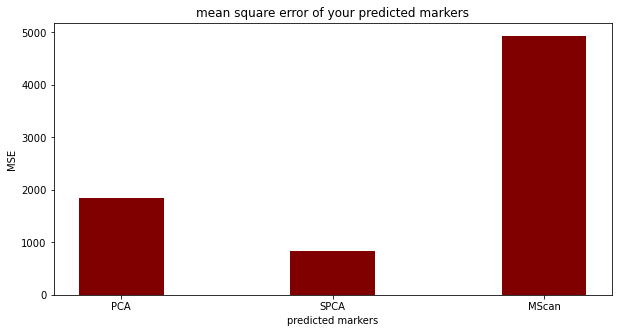

In [29]:
data = {'PCA':msepca, 'SPCA':msespca,
        'MScan':msesmk}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("predicted markers")
plt.ylabel("MSE")
plt.title("mean square error of your predicted markers")
plt.show()

In [4]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Generate sample data with four centers
centers = [
[1, 1], 
[-1, -1], 
[1, -1],
[0,-2]
]
# create n_sample points at centers
# create dataset with 3 clusters
X, labels_true = make_blobs(n_samples=1000,  centers=centers, 
cluster_std=0.4,random_state=0)
#print(labels_true)
X = StandardScaler().fit_transform(X)

In [42]:
len(AAPL_df)

5850

In [54]:
data = AAPL_df
data = data.drop(['Date'], axis = 1)
labels_true  = data.marketAverage
data = data[["marketClose","marketHigh"]]
X = data

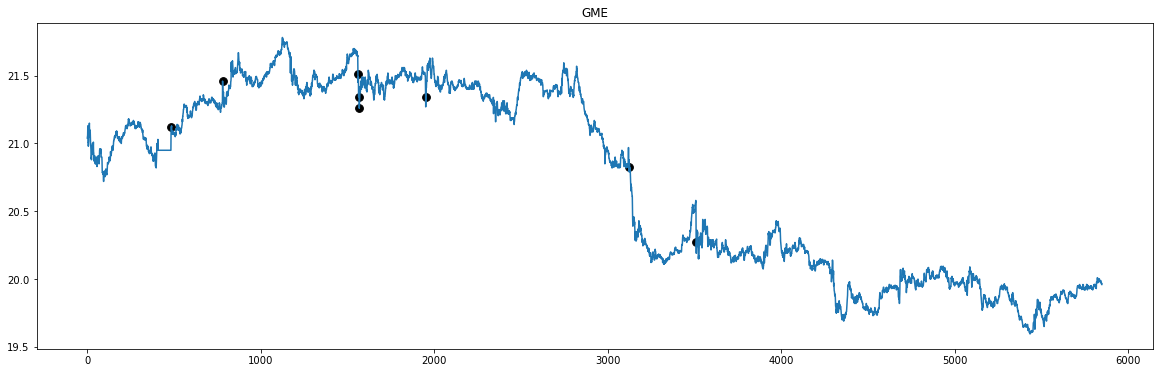

In [106]:
data, mkhh = get_markers(AAPL_df, .6) 
d = data[:1000]
data = data[:1000].drop(['Marker'], axis = 1)
data = data.drop(['Date'], axis = 1)
X = data[["marketClose","marketHigh"]]
labels_true = d.marketAverage
db = DBSCAN(eps=0.35, min_samples=40).fit(X)
# take a detailed look about the an object strcuture
#print(db.__dict__)
# noisy samples are labelled as -1
#print(db.labels_)

In [101]:
n_noisy_points=len(db.labels_[db.labels_==-1])
print('There are ' + str(n_noisy_points) + ' noisy points')

There are 0 noisy points


In [107]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [108]:
print('\nChecking labels...')
print(set(labels))
print(len(labels[labels==-1]))
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print(n_noise_)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Checking labels...
{0}
0
0
Estimated number of clusters: 1
Estimated number of noise points: 0


In [104]:
import matplotlib.pyplot as plt
unique_labels = set(labels)
print(unique_labels)
fig=plt.figure(figsize=(10,7))
color_list=['r','g', 'c']
print(unique_labels)

{0}
{0}


<Figure size 720x504 with 0 Axes>

In [105]:
for k in unique_labels:
    class_member_mask = (labels == k)
# all core samples
    xy = X[class_member_mask & core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'd', markerfacecolor=color_list[k],markeredgecolor='w',
             markersize=10, label='core points')
# non-core samples
    xy2 = X[class_member_mask & ~core_samples_mask]
    if k==-1:
        plt.plot(xy2[:, 0], xy2[:, 1], 's', markerfacecolor='lightblue',
        markeredgecolor='b', markersize=8, label='outliers')
    else:
        plt.plot(xy2[:, 0], xy2[:, 1], 'o', markerfacecolor=color_list[k],markeredgecolor='w',
                 markersize=10, label='reachable points')
plt.legend()

TypeError: '(slice(None, None, None), 0)' is an invalid key